<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,0.000003,216.808576,216.808574,0.000002
1,0.0,1.0,31.366483,71.034415,96.409285,-0.000003,208.810179,208.810170,0.000009
2,0.0,2.0,51.922364,82.986706,60.410357,0.000004,205.319431,205.319433,-0.000002
3,0.0,3.0,78.696281,81.280583,59.766649,-0.000002,229.743512,229.743513,-0.000001
4,0.0,4.0,48.841553,88.182138,52.523629,-0.000008,199.547313,199.547334,-0.000021
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-0.000030,101.716444,101.716449,-0.000004
119996,999.0,116.0,27.906656,51.078876,95.044667,0.000014,184.030212,184.030180,0.000032
119997,999.0,117.0,95.548916,24.560497,20.532904,-0.000053,150.642263,150.642283,-0.000020
119998,999.0,118.0,22.596330,30.274677,65.326228,-0.000047,128.197189,128.197209,-0.000020


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,0.000003,216.808576,216.808574,0.000002
1,0.0,1.0,31.366483,71.034415,96.409285,-0.000003,208.810179,208.810170,0.000009
2,0.0,2.0,51.922364,82.986706,60.410357,0.000004,205.319431,205.319433,-0.000002
3,0.0,3.0,78.696281,81.280583,59.766649,-0.000002,229.743512,229.743513,-0.000001
4,0.0,4.0,48.841553,88.182138,52.523629,-0.000008,199.547313,199.547334,-0.000021
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-0.000030,101.716444,101.716449,-0.000004
119996,999.0,116.0,27.906656,51.078876,95.044667,0.000014,184.030212,184.030180,0.000032
119997,999.0,117.0,95.548916,24.560497,20.532904,-0.000053,150.642263,150.642283,-0.000020
119998,999.0,118.0,22.596330,30.274677,65.326228,-0.000047,128.197189,128.197209,-0.000020


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.707638  92.860426  89.240509  ...  216.808576  216.808574  0.000002
      1.0    31.366483  71.034415  96.409285  ...  208.810179  208.810170  0.000009
      2.0    51.922364  82.986706  60.410357  ...  205.319431  205.319433 -0.000002
      3.0    78.696281  81.280583  59.766649  ...  229.743512  229.743513 -0.000001
      4.0    48.841553  88.182138  52.523629  ...  199.547313  199.547334 -0.000021
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.640988  24.961075  29.114412  ...  101.716444  101.716449 -0.000004
      116.0  27.906656  51.078876  95.044667  ...  184.030212  184.030180  0.000032
      117.0  95.548916  24.560497  20.532904  ...  150.642263  150.642283 -0.000020
      118.0  22.596330  30.274677  65.326228  ...  128.197189  128.197209 -0.000020
      119.0  79.887997  22.570105  39.005271  ...  151.463290  151.463337 -0.000047

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.707638  92.860426  89.240509  ...  216.808576  216.808574  0.000002
      1.0    31.366483  71.034415  96.409285  ...  208.810179  208.810170  0.000009
      2.0    51.922364  82.986706  60.410357  ...  205.319431  205.319433 -0.000002
      3.0    78.696281  81.280583  59.766649  ...  229.743512  229.743513 -0.000001
      4.0    48.841553  88.182138  52.523629  ...  199.547313  199.547334 -0.000021
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.640988  24.961075  29.114412  ...  101.716444  101.716449 -0.000004
      116.0  27.906656  51.078876  95.044667  ...  184.030212  184.030180  0.000032
      117.0  95.548916  24.560497  20.532904  ...  150.642263  150.642283 -0.000020
      118.0  22.596330  30.274677  65.326228  ...  128.197189  128.197209 -0.000020
      119.0  79.887997  22.570105  39.005271  ...  151.463290  151.463337 -0.000047

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.707638,92.860426,89.240509,0.000003,216.808576,216.808574,0.000002
1,0.0,1.0,31.366483,71.034415,96.409285,-0.000003,208.810179,208.810170,0.000009
2,0.0,2.0,51.922364,82.986706,60.410357,0.000004,205.319431,205.319433,-0.000002
3,0.0,3.0,78.696281,81.280583,59.766649,-0.000002,229.743512,229.743513,-0.000001
4,0.0,4.0,48.841553,88.182138,52.523629,-0.000008,199.547313,199.547334,-0.000021
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.640988,24.961075,29.114412,-0.000030,101.716444,101.716449,-0.000004
119996,999.0,116.0,27.906656,51.078876,95.044667,0.000014,184.030212,184.030180,0.000032
119997,999.0,117.0,95.548916,24.560497,20.532904,-0.000053,150.642263,150.642283,-0.000020
119998,999.0,118.0,22.596330,30.274677,65.326228,-0.000047,128.197189,128.197209,-0.000020


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    24.707638  92.860426  89.240509  ...  216.808576  216.808574  0.000002
      1.0    31.366483  71.034415  96.409285  ...  208.810179  208.810170  0.000009
      2.0    51.922364  82.986706  60.410357  ...  205.319431  205.319433 -0.000002
      3.0    78.696281  81.280583  59.766649  ...  229.743512  229.743513 -0.000001
      4.0    48.841553  88.182138  52.523629  ...  199.547313  199.547334 -0.000021
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.640988  24.961075  29.114412  ...  101.716444  101.716449 -0.000004
      116.0  27.906656  51.078876  95.044667  ...  184.030212  184.030180  0.000032
      117.0  95.548916  24.560497  20.532904  ...  150.642263  150.642283 -0.000020
      118.0  22.596330  30.274677  65.326228  ...  128.197189  128.197209 -0.000020
      119.0  79.887997  22.570105  39.005271  ...  151.463290  151.463337 -0.000047

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]

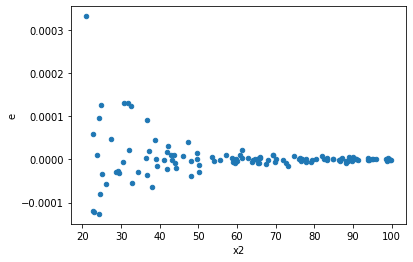

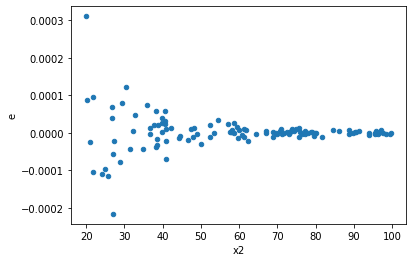

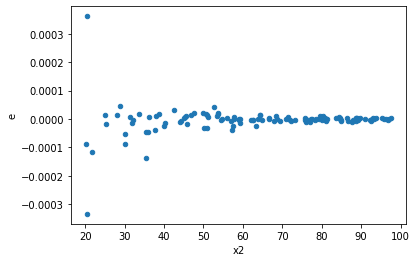

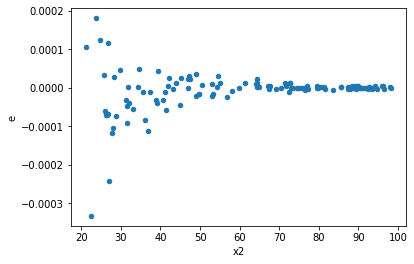

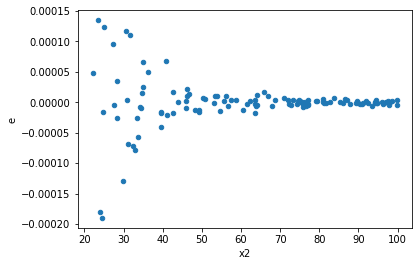

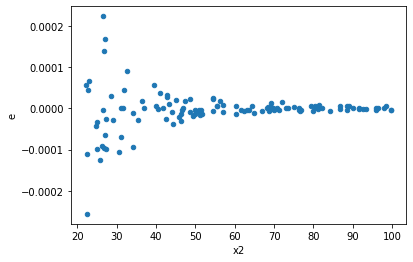

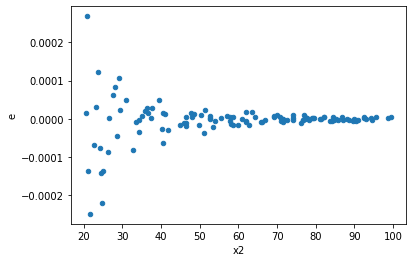

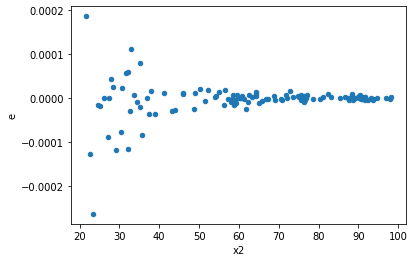

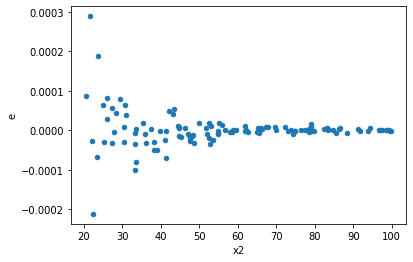

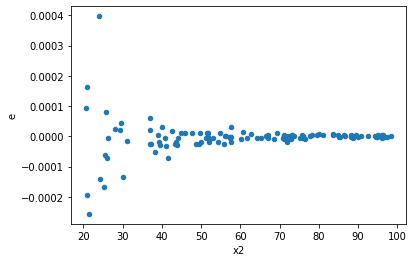

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,7.392406280702757e-10,4.0846863908583937e-07,1.6800923365233537e-11,9.283378161041804e-09,0.0018097855192132017,7.621645344792839e-50,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,7.006660470190193e-10,2.0058139827123647e-07,1.592422834134135e-11,4.558668142528101e-09,0.0034931756038091965,1.890103749699341e-43,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,5.498612583810718e-10,2.131135743062351e-07,1.2496846781387996e-11,4.843490325141707e-09,0.00258013249588196,2.1527930610661264e-46,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.3080389343704215e-09,2.9624987803001853e-07,2.972815759932776e-11,6.732951773409512e-09,0.004415323115298904,3.5358831398261725e-41,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,8.433177205694908e-10,2.842553951472614e-07,1.916631183112479e-11,6.4603498897104864e-09,0.002966760648931928,4.900042890177319e-45,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,9.592721230335262e-10,1.822416900356369e-07,2.1801639159852868e-11,4.141856591719021e-09,0.005263735881981466,1.7789470212345376e-39,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,1.2756985661259642e-09,2.195529460386766e-07,2.899314923013555e-11,4.989839682697195e-09,0.005810437022791013,1.6053611110866832e-38,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,9.945281647029134e-10,2.4132540682624164e-07,2.2602912834157124e-11,5.484668336960037e-09,0.004121108414494419,7.588198996950091e-42,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,1.2632510012889935e-09,2.6072407815322656e-07,2.8710250029295308e-11,5.925547230755149e-09,0.004845164321749316,2.8072350374063513e-40,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64